<a href="https://colab.research.google.com/github/Kabzel55/CCN_multiple_classifier/blob/master/CCN_multiple_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import shutil
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.applications import VGG19
import plotly.figure_factory as ff

np.set_printoptions(precision=6, suppress=True)

In [50]:
# link to data:
#https://drive.google.com/file/d/1Apzg0rZQrr7jiFiCc3J2u8xphaDR7Wh4/view?usp=sharing
#!unzip -q planes.zip

In [ ]:
!rm -rf ./images

In [ ]:
base_dir = './planes/'
number_of_files = {}
classes = ['drone', 'helicopter', 'passenger-plane']

for dir in classes:
    number_of_files[dir] = len(os.listdir(os.path.join(base_dir,dir)))
number_of_files

{'drone': 1332, 'helicopter': 1387, 'passenger-plane': 1424}

In [ ]:
data_dir = './images'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

train_drone_dir = os.path.join(train_dir, 'drone')
train_passenger_dir = os.path.join(train_dir, 'passenger')
train_helicopter_dir = os.path.join(train_dir, 'helicopter')

valid_drone_dir = os.path.join(valid_dir, 'drone')
valid_passenger_dir = os.path.join(valid_dir, 'passenger')
valid_helicopter_dir = os.path.join(valid_dir, 'helicopter')

test_drone_dir = os.path.join(test_dir, 'drone')
test_passenger_dir = os.path.join(test_dir, 'passenger')
test_helicopter_dir = os.path.join(test_dir, 'helicopter')

for directory in (train_dir, valid_dir, test_dir):
    if not os.path.exists(directory):
        os.mkdir(directory)

dirs = [train_drone_dir, train_passenger_dir, train_helicopter_dir,
        valid_drone_dir, valid_passenger_dir, valid_helicopter_dir,
        test_drone_dir, test_passenger_dir, test_helicopter_dir]

for dir in dirs:
    if not os.path.exists(dir):
        os.mkdir(dir)

In [ ]:
drone_fnames = os.listdir(os.path.join(base_dir, 'drone'))
passenger_fnames = os.listdir(os.path.join(base_dir, 'passenger-plane'))
helicopter_fnames = os.listdir(os.path.join(base_dir, 'helicopter'))

drone_fnames = [fname for fname in drone_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
passenger_fnames = [fname for fname in passenger_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]
helicopter_fnames = [fname for fname in helicopter_fnames if fname.split('.')[1].lower() in ['jpg', 'png', 'jpeg']]

In [ ]:
size = min(len(drone_fnames), len(passenger_fnames), len(helicopter_fnames))

train_size = int(np.floor(0.7 * size))
valid_size = int(np.floor(0.2 * size))
test_size = size - train_size - valid_size

train_max_index = train_size
valid_max_index = train_size + valid_size
test_max_index = size

In [ ]:
for index, fname in enumerate(drone_fnames):
    if index <= train_max_index:
        src = os.path.join(base_dir, 'drone', fname)
        dst = os.path.join(train_drone_dir, fname)
        shutil.copyfile(src, dst)
    elif train_max_index < index <= valid_max_index:
        src = os.path.join(base_dir, 'drone', fname)
        dst = os.path.join(valid_drone_dir, fname)
        shutil.copyfile(src, dst)
    elif valid_max_index < index < size:
        src = os.path.join(base_dir, 'drone', fname)
        dst = os.path.join(test_drone_dir, fname)
        shutil.copyfile(src, dst)
#--------------------------------------------------------------
for index, fname in enumerate(passenger_fnames):
    if index <= train_max_index:
        src = os.path.join(base_dir, 'passenger-plane', fname)
        dst = os.path.join(train_passenger_dir, fname)
        shutil.copyfile(src, dst)
    elif train_max_index < index <= valid_max_index:
        src = os.path.join(base_dir, 'passenger-plane', fname)
        dst = os.path.join(valid_passenger_dir, fname)
        shutil.copyfile(src, dst)
    elif valid_max_index < index < size:
        src = os.path.join(base_dir, 'passenger-plane', fname)
        dst = os.path.join(test_passenger_dir, fname)
        shutil.copyfile(src, dst)
#--------------------------------------------------------------
for index, fname in enumerate(helicopter_fnames):
    if index <= train_max_index:
        src = os.path.join(base_dir, 'helicopter', fname)
        dst = os.path.join(train_helicopter_dir, fname)
        shutil.copyfile(src, dst)
    elif train_max_index < index <= valid_max_index:
        src = os.path.join(base_dir, 'helicopter', fname)
        dst = os.path.join(valid_helicopter_dir, fname)
        shutil.copyfile(src, dst)
    elif valid_max_index < index < size:
        src = os.path.join(base_dir, 'helicopter', fname)
        dst = os.path.join(test_helicopter_dir, fname)
        shutil.copyfile(src, dst)

print('drone - zbior treningowy', len(os.listdir(train_drone_dir)))
print('drone - zbior validacyjny', len(os.listdir(valid_drone_dir)))
print('drone - zbior testowy', len(os.listdir(test_drone_dir)))

print('passenger-plane - zbior treningowy', len(os.listdir(train_passenger_dir)))
print('passenger-plane - zbior validacyjny', len(os.listdir(valid_passenger_dir)))
print('passenger-plane - zbior testowy', len(os.listdir(test_passenger_dir)))

print('helicopter - zbior treningowy', len(os.listdir(train_helicopter_dir)))
print('helicopter - zbior validacyjny', len(os.listdir(valid_helicopter_dir)))
print('helicopter - zbior testowy', len(os.listdir(test_helicopter_dir)))

drone - zbior treningowy 919
drone - zbior validacyjny 262
drone - zbior testowy 131
passenger-plane - zbior treningowy 919
passenger-plane - zbior validacyjny 262
passenger-plane - zbior testowy 131
helicopter - zbior treningowy 919
helicopter - zbior validacyjny 262
helicopter - zbior testowy 131


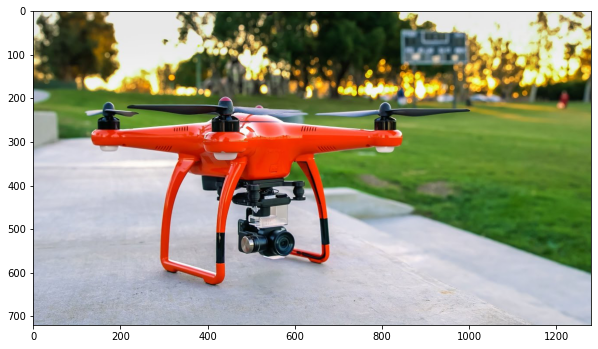

In [27]:
#@title Drone
idx = 784 #@param {type:'slider', min:0, max:919}
dron_mapping = dict(enumerate(drone_fnames))
img_path = os.path.join(train_drone_dir, dron_mapping[idx])

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)

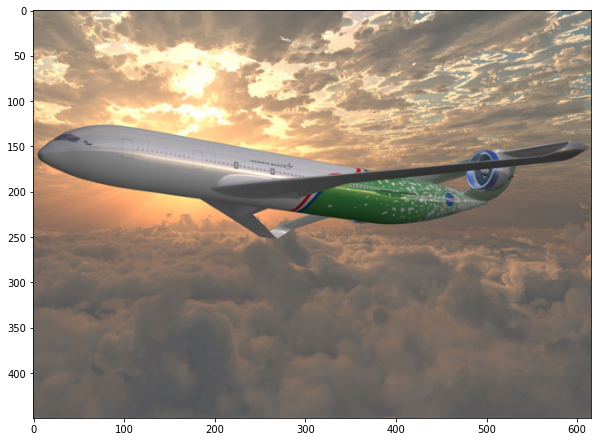

In [29]:
#@title Passenger-plane
idx = 140 #@param {type:'slider', min:0, max:919}
passenger_mapping = dict(enumerate(passenger_fnames))
img_path = os.path.join(train_passenger_dir, passenger_mapping[idx])

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)

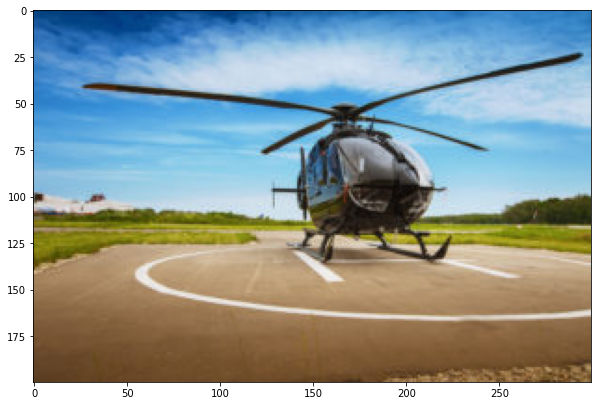

In [ ]:
#@title helicopter
idx = 583 #@param {type:'slider', min:0, max:919}
helicopter_mapping = dict(enumerate(helicopter_fnames))
img_path = os.path.join(train_helicopter_dir, helicopter_mapping[idx])

img = image.load_img(img_path)

plt.figure(figsize=(10,10))
plt.imshow(img)

### Augmentacja danych

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    rescale = 1./255.,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest' 
)

valid_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(150,150), batch_size=32, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(directory=valid_dir, target_size=(150,150), batch_size=32, class_mode='categorical')

Found 2757 images belonging to 3 classes.
Found 786 images belonging to 3 classes.


In [ ]:
def dispaly_augmented_images(directory, idx):
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[idx]
    img = image.load_img(img_path, target_size=(150,150))

    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i =1 
    plt.figure(figsize=(16,8))
    for batch in train_datagen.flow(x, batch_size=1):
        plt.subplot(2,5,i)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i+=1
        if i % 11 ==0:
            break

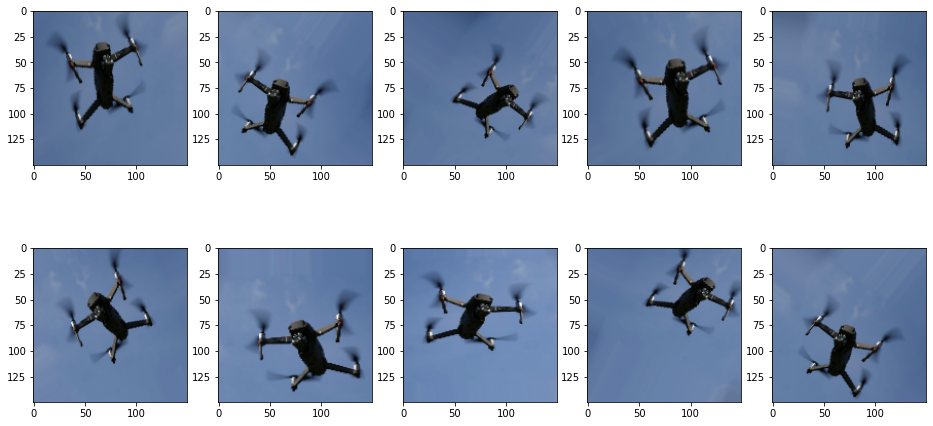

In [33]:
idx = 810 #@param {type:'slider', min:0, max:919}
dispaly_augmented_images(train_drone_dir,idx)

In [21]:
batch_size = 32
steps_per_epoch = train_size // batch_size
validation_steps = valid_size // batch_size

### Tranfer Learning - model VGG19

In [ ]:
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.trainable = True

def print_layers(model):
    for layer in model.layers:
        print(f'layer_name: {layer.name:13} trainable: {layer.trainable}')
print_layers(conv_base)

In [ ]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

print_layers(conv_base)

In [ ]:
model = Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 22,122,563
Trainable params: 11,537,411
Non-trainable params: 10,585,152
_________________________________________________________________


In [ ]:
history = model.fit_generator(generator=train_generator,
                             steps_per_epoch=steps_per_epoch,
                             epochs=30,    
                             validation_data=valid_generator,
                             validation_steps=validation_steps)

In [39]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'],y=hist['accuracy'], name='accuracy',mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'],y=hist['val_accuracy'], name='val_accuracy',mode='markers+lines'))
    fig.update_layout(width= 1200, height=600,title='Acc and val_acc', xaxis_title='Epoki', yaxis_title='Accuracy')
    fig.show()


    fig = go.Figure()
    fig.add_trace(go.Scatter(x=hist['epoch'],y=hist['loss'], name='loss',mode='markers+lines'))
    fig.add_trace(go.Scatter(x=hist['epoch'],y=hist['val_loss'], name='val_loss',mode='markers+lines'))
    fig.update_layout(width= 1200, height=600,title='loss and val_loss', xaxis_title='Epoki', yaxis_title='loss')
    fig.show()

plot_history(history)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255.)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)
y_prob = model.predict_generator(test_generator, test_generator.samples)
y_prob

In [ ]:
y_pred = np.argmax(y_prob, axis=1)
y_pred

In [ ]:
predictions = pd.DataFrame({'class':y_pred})
predictions

In [ ]:
y_true = test_generator.classes
y_pred = predictions['class'].values
test_generator.class_indices

In [ ]:
classes = list(test_generator.class_indices.keys())
classes

In [ ]:
confm = confusion_matrix(y_true, y_pred)
confm

In [49]:
def plot_confusion_matrix(confm):
    confm = confm[::-1]
    confm = pd.DataFrame(confm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=confm.values, x=list(confm.columns), y=list(confm.index), colorscale='ice',showscale=True, reversescale=True)
    fig.update_layout(width=600,height=600,title='Confusion Matrix', font_size=16)
    fig.show()
plot_confusion_matrix(confm)